# Name - Pranjal Sarkari
# Data Science & Business Analytics
# Task4 - Exploratory Data Analysis - Terrorism
# Objective:
## In this task we will perform exploratory data analysis on global terrorism dataset to find the hot zone of terrorism.

## Importing Useful Libraries And Dataset.

In [1]:
# importing useful libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing our dataset
# since our dataset is not encoded in utf-8 that's why we have to encode this data in 'iso-8859-1' form.
data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding = "ISO-8859-1", engine='python')
data = data.iloc[:1500]
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970.0,7.0,2.0,NaN,0.0,NaN,58.0,Dominican Republic,2.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,1.970000e+11,1970.0,0.0,0.0,NaN,0.0,NaN,130.0,Mexico,1.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,1.970010e+11,1970.0,1.0,0.0,NaN,0.0,NaN,160.0,Philippines,5.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,1.970010e+11,1970.0,1.0,0.0,NaN,0.0,NaN,78.0,Greece,8.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,1.970010e+11,1970.0,1.0,0.0,NaN,0.0,NaN,101.0,Japan,4.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [3]:
data.shape

(1500, 135)

# Refining and cleaning the data 

## On observing the data we find that there are many undesirable column present in this data which we have to remove from it.

In [4]:
data_1 = data.drop(['approxdate' , 'extended'	,'resolution'	, 'latitude' ,'attacktype2'	,'attacktype2_txt'	,'attacktype3'	,'attacktype3_txt'	,'longitude' ,	'specificity','guncertain2'	,'guncertain3'	,	'vicinity',	'location',	'summary',	'crit1',	'crit2',	'crit3'	,'doubtterr' ,	'alternative'	, 'alternative_txt' , 'ransom'	,'ransomamt'	,'ransomamtus'	,'ransompaid'	,'ransompaidus'	,'ransomnote'	,'hostkidoutcome'	,'hostkidoutcome_txt'	,'nreleased'	,'addnotes'	,'scite1'	,'scite2' , 'scite3' ,'nwound'	,'nwoundus'	,'nwoundte', 'propcomment',	'ishostkid' ,	'nhostkid',	'nhostkidus'	,'nhours','ndays'	,'divert',	'kidhijcountry'	,'dbsource'  , 'nperpcap'	, 'claimed',	'claimmode',	'claimmode_txt'	,'claim2',	'claimmode2',	'claimmode2_txt',	'claim3'	,'claimmode3'	,'claimmode3_txt'	,'compclaim'] , axis =1) 


## Checking the missing values.

In [5]:
data_1.isnull()

,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,...,nkillter,property,propextent,propextent_txt,propvalue,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,False,False,False,False,False,False,False,False,True,False,...,True,False,True,True,True,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,True,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,True,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,True,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1496,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1497,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,True,False,False,False,False,True
1498,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,True,False,False,False,False,True


## Description Of Data

In [6]:
data_1.describe()

,eventid,iyear,imonth,iday,country,region,multiple,success,suicide,attacktype1,...,nkill,nkillus,nkillter,property,propextent,propvalue,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.499000e+03,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.0,1499.000000,...,1355.000000,616.000000,614.000000,1499.000000,759.000000,3.360000e+02,1499.000000,1499.000000,1499.000000,1499.000000
mean,1.970875e+11,1970.817211,5.779853,15.258839,283.793863,4.115410,0.096731,0.867912,0.0,3.519680,...,0.592620,0.079545,0.050489,0.326217,3.205534,1.434890e+05,-4.166778,-4.066044,0.384256,-2.813209
std,8.056562e+07,0.807969,3.063562,9.021913,174.563104,3.571792,0.295690,0.338699,0.0,2.047528,...,3.122928,0.354076,0.355417,1.795537,0.450647,6.022322e+05,4.555569,4.663043,0.732913,4.691390
min,1.970000e+11,1970.000000,0.000000,0.000000,11.000000,1.000000,0.000000,0.000000,0.0,1.000000,...,0.000000,0.000000,0.000000,-9.000000,2.000000,0.000000e+00,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.970060e+11,1970.000000,3.000000,7.000000,217.000000,1.000000,0.000000,1.000000,0.0,2.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000e+03,-9.000000,-9.000000,0.000000,-9.000000
50%,1.971030e+11,1971.000000,5.000000,15.000000,217.000000,1.000000,0.000000,1.000000,0.0,3.000000,...,0.000000,0.000000,0.000000,1.000000,3.000000,7.750000e+03,0.000000,0.000000,0.000000,0.000000
75%,1.972005e+11,1972.000000,8.000000,23.000000,233.000000,8.000000,0.000000,1.000000,0.0,4.000000,...,1.000000,0.000000,0.000000,1.000000,3.000000,5.000000e+04,0.000000,0.000000,1.000000,1.000000
max,1.972090e+11,1972.000000,12.000000,31.000000,603.000000,12.000000,1.000000,1.000000,0.0,9.000000,...,81.000000,4.000000,5.000000,1.000000,4.000000,7.000000e+06,1.000000,1.000000,1.000000,1.000000


## Info about data

In [7]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 78 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   eventid           1499 non-null   float64
 1   iyear             1499 non-null   float64
 2   imonth            1499 non-null   float64
 3   iday              1499 non-null   float64
 4   country           1499 non-null   float64
 5   country_txt       1499 non-null   object 
 6   region            1499 non-null   float64
 7   region_txt        1499 non-null   object 
 8   provstate         1496 non-null   object 
 9   city              1499 non-null   object 
 10  multiple          1499 non-null   float64
 11  success           1499 non-null   float64
 12  suicide           1499 non-null   float64
 13  attacktype1       1499 non-null   float64
 14  attacktype1_txt   1499 non-null   object 
 15  targtype1         1499 non-null   float64
 16  targtype1_txt     1499 non-null   object 


## Plotting the graph

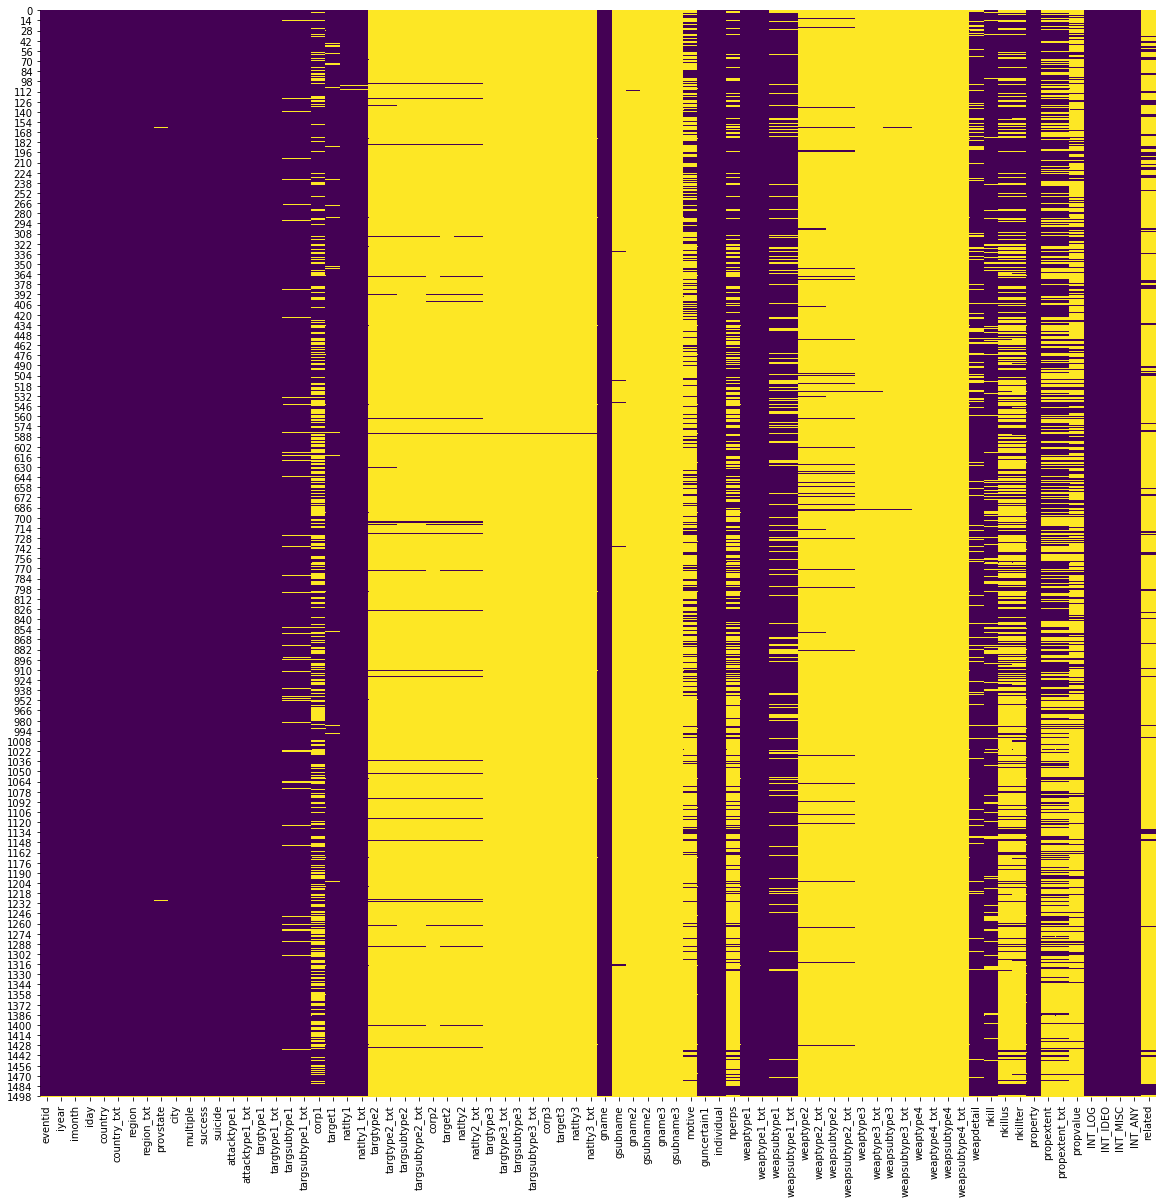

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(data_1. isnull() ,cbar = False , cmap='viridis')

## Finding the relationship between the attributes of the given dataset and analyzing it.

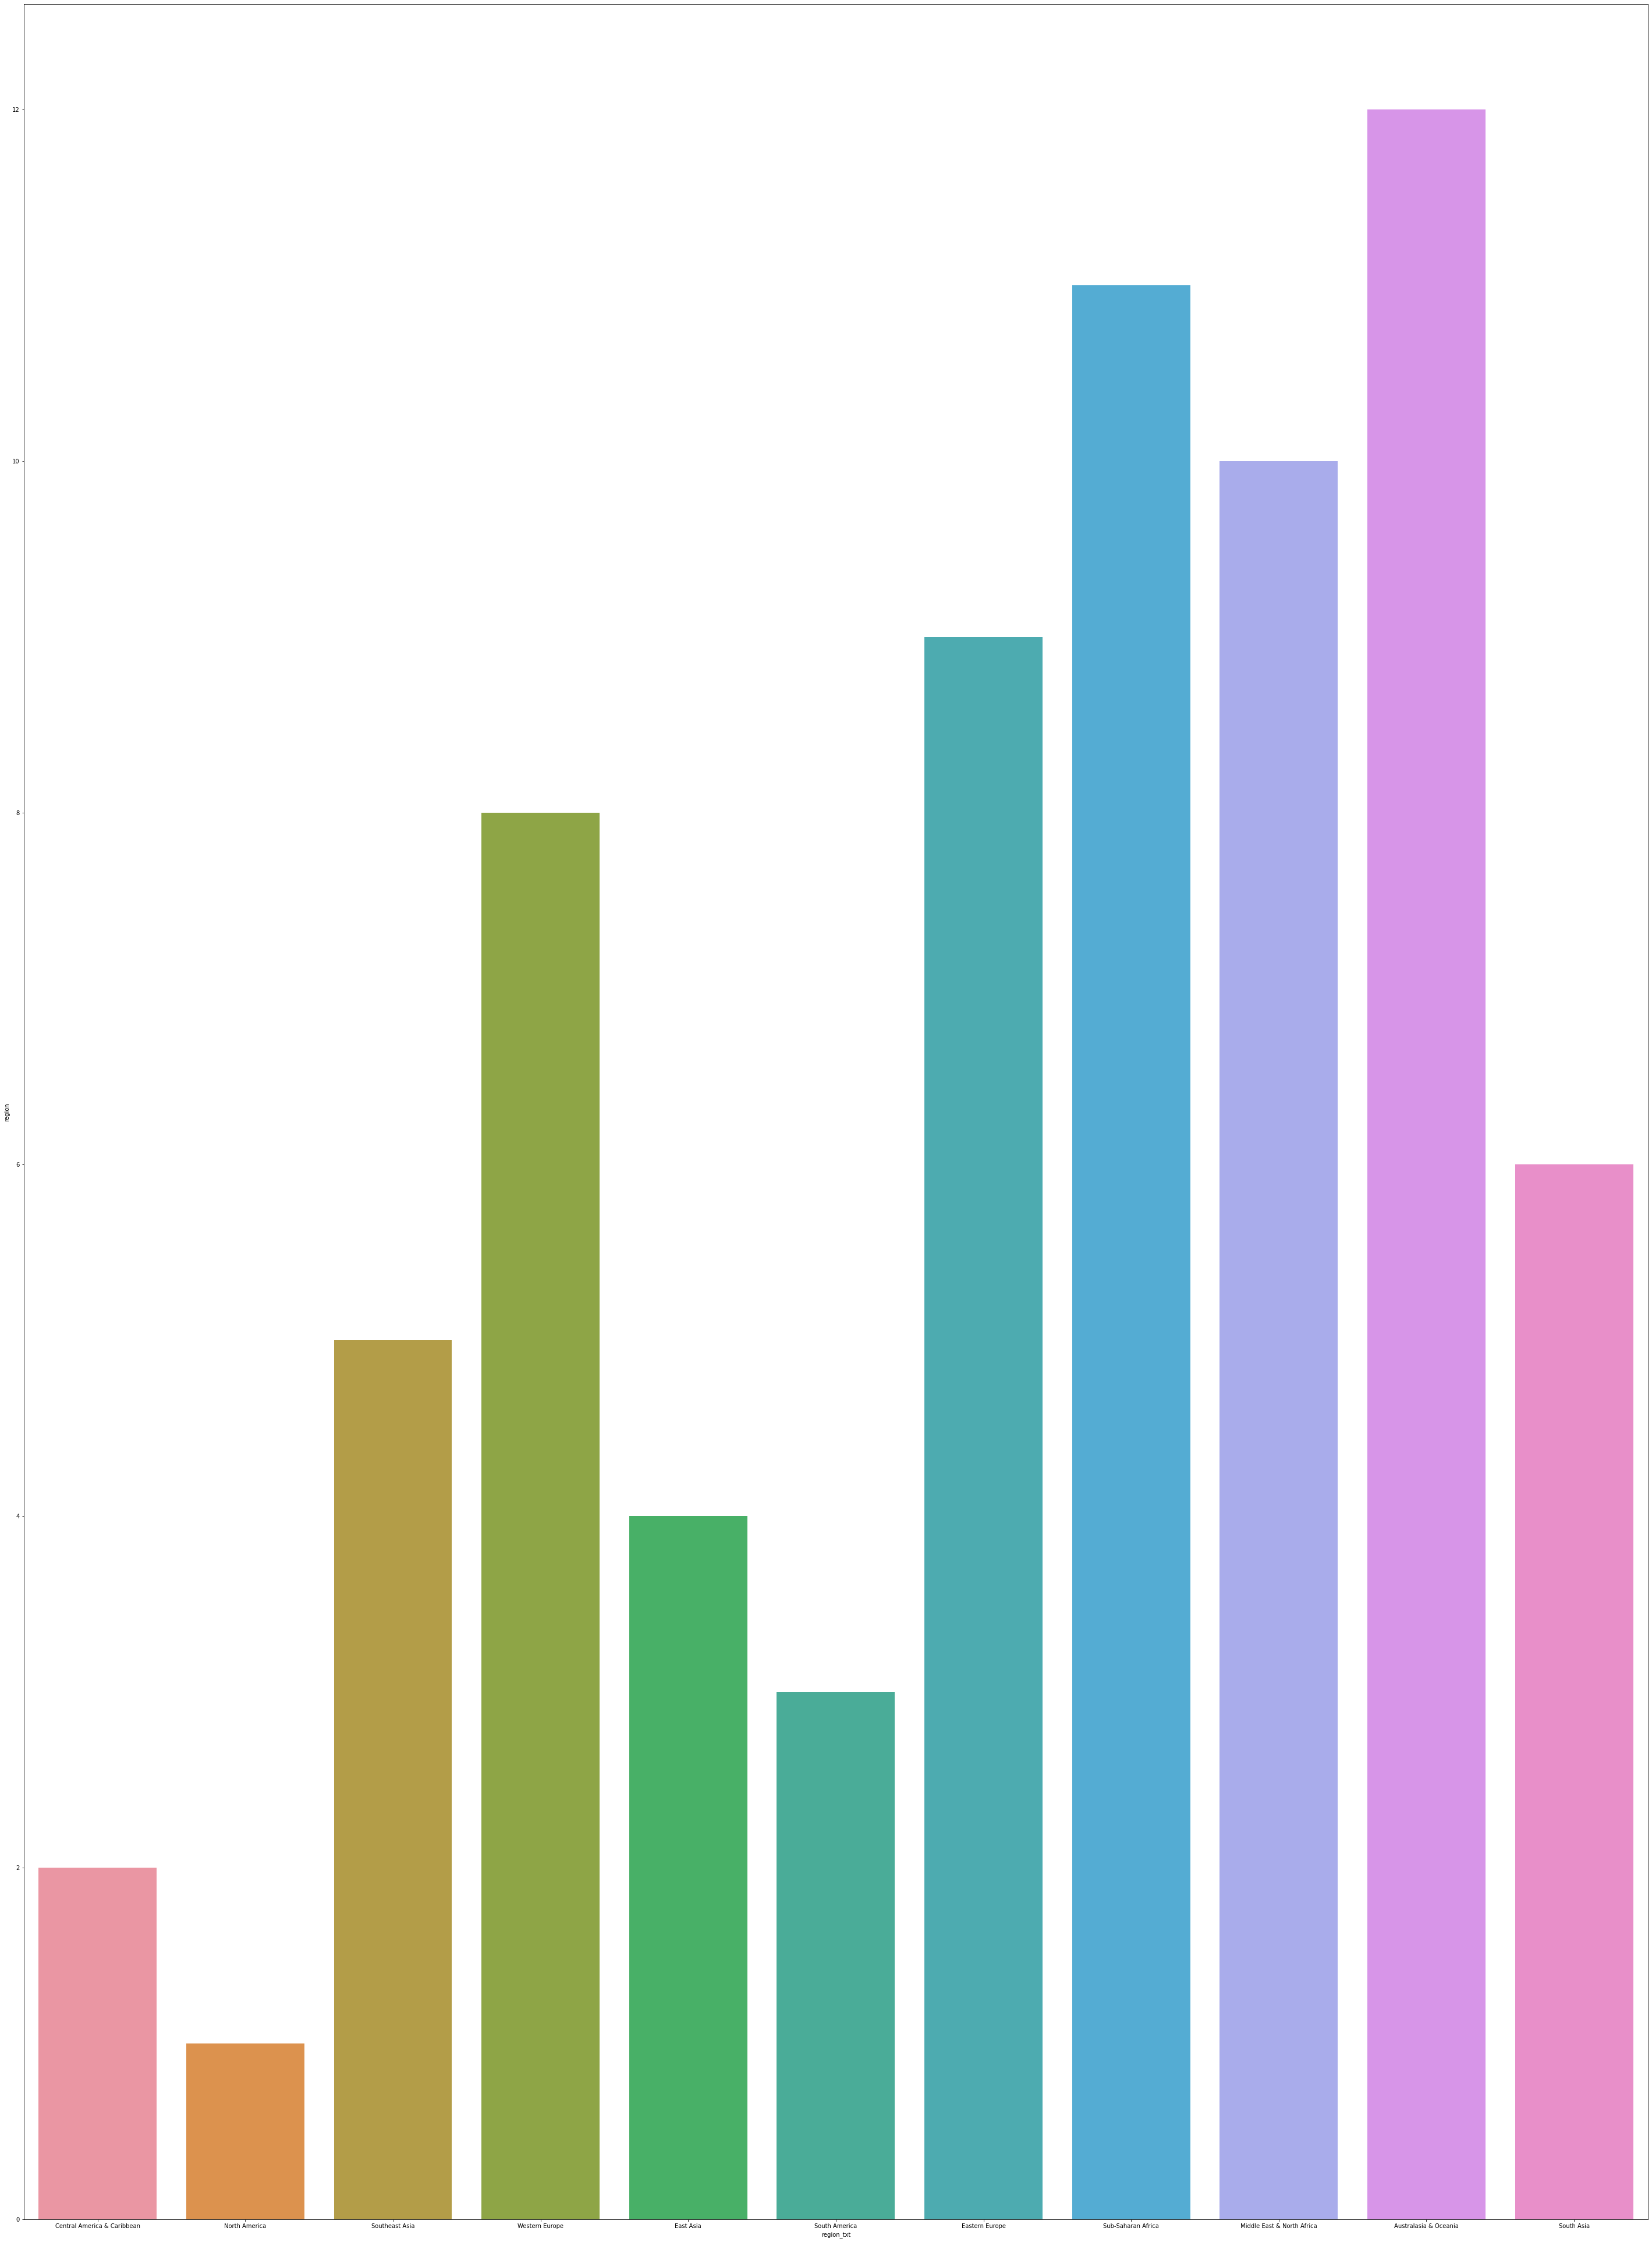

In [9]:
plt.figure(figsize=(50,70))
sns.barplot(x='region_txt' , y='region' , data=data_1)

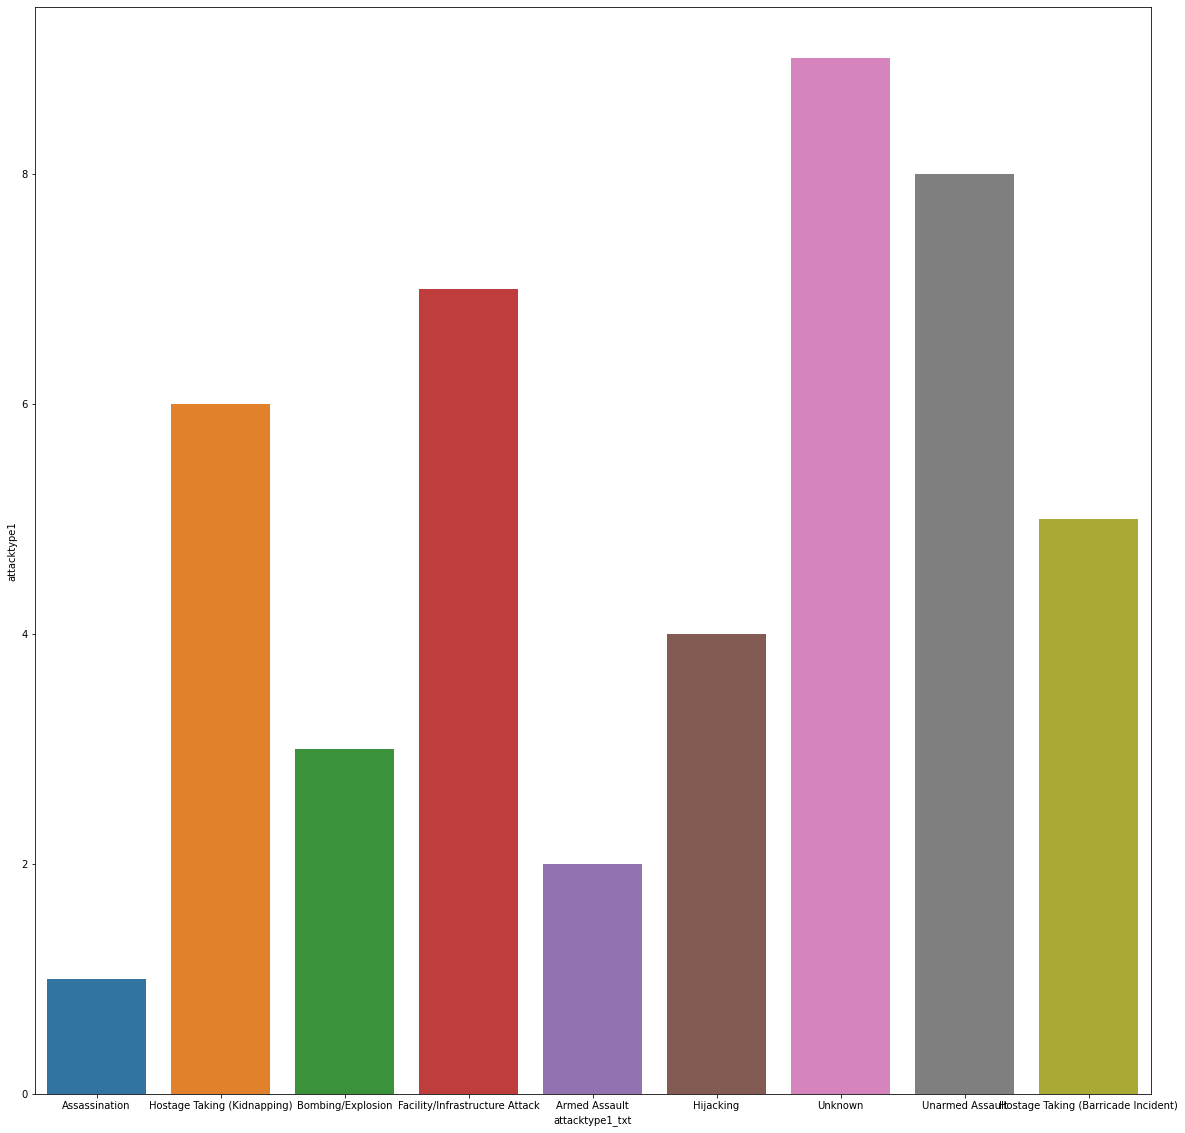

In [10]:
# relation between attacktype1_txt and attacktype1.
plt.figure(figsize=(20,20))
sns.barplot(x='attacktype1_txt' , y='attacktype1' , data=data_1)

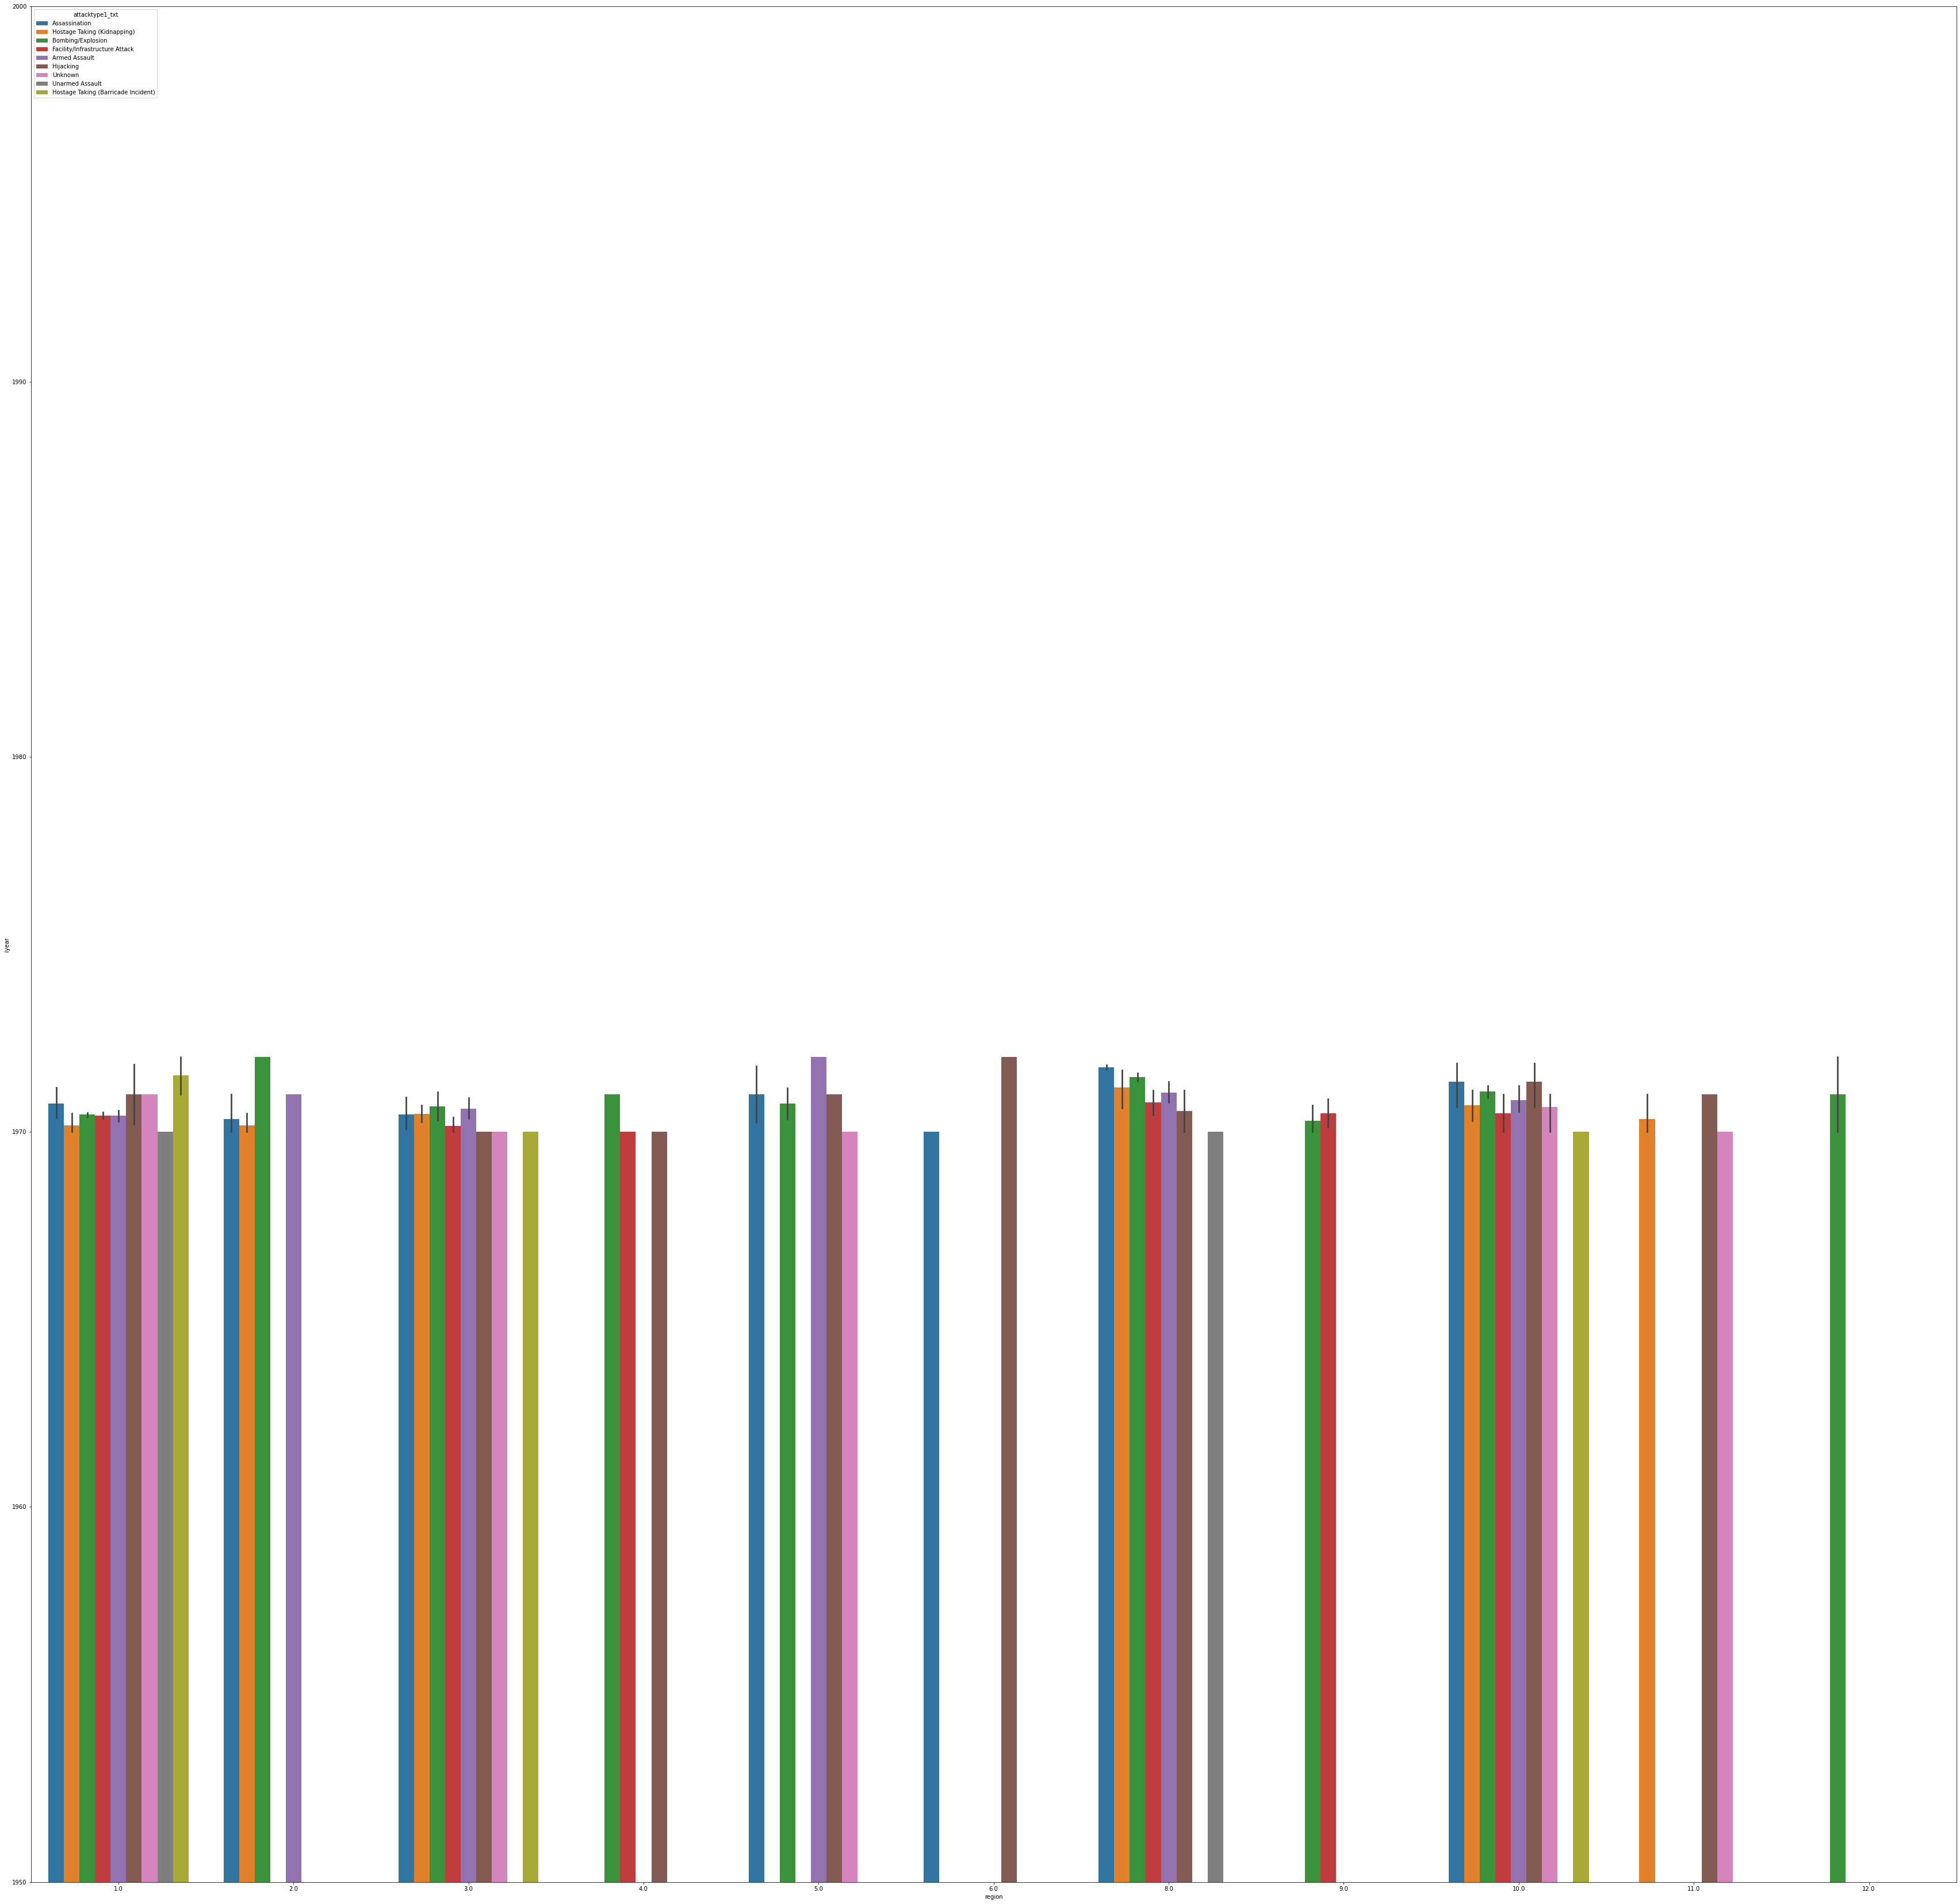

In [11]:
plt.figure(figsize=(60,60))
plt.axis([0,15, 1950,2000])
sns.barplot(x='region' , y='iyear' ,hue='attacktype1_txt' , data=data_1)

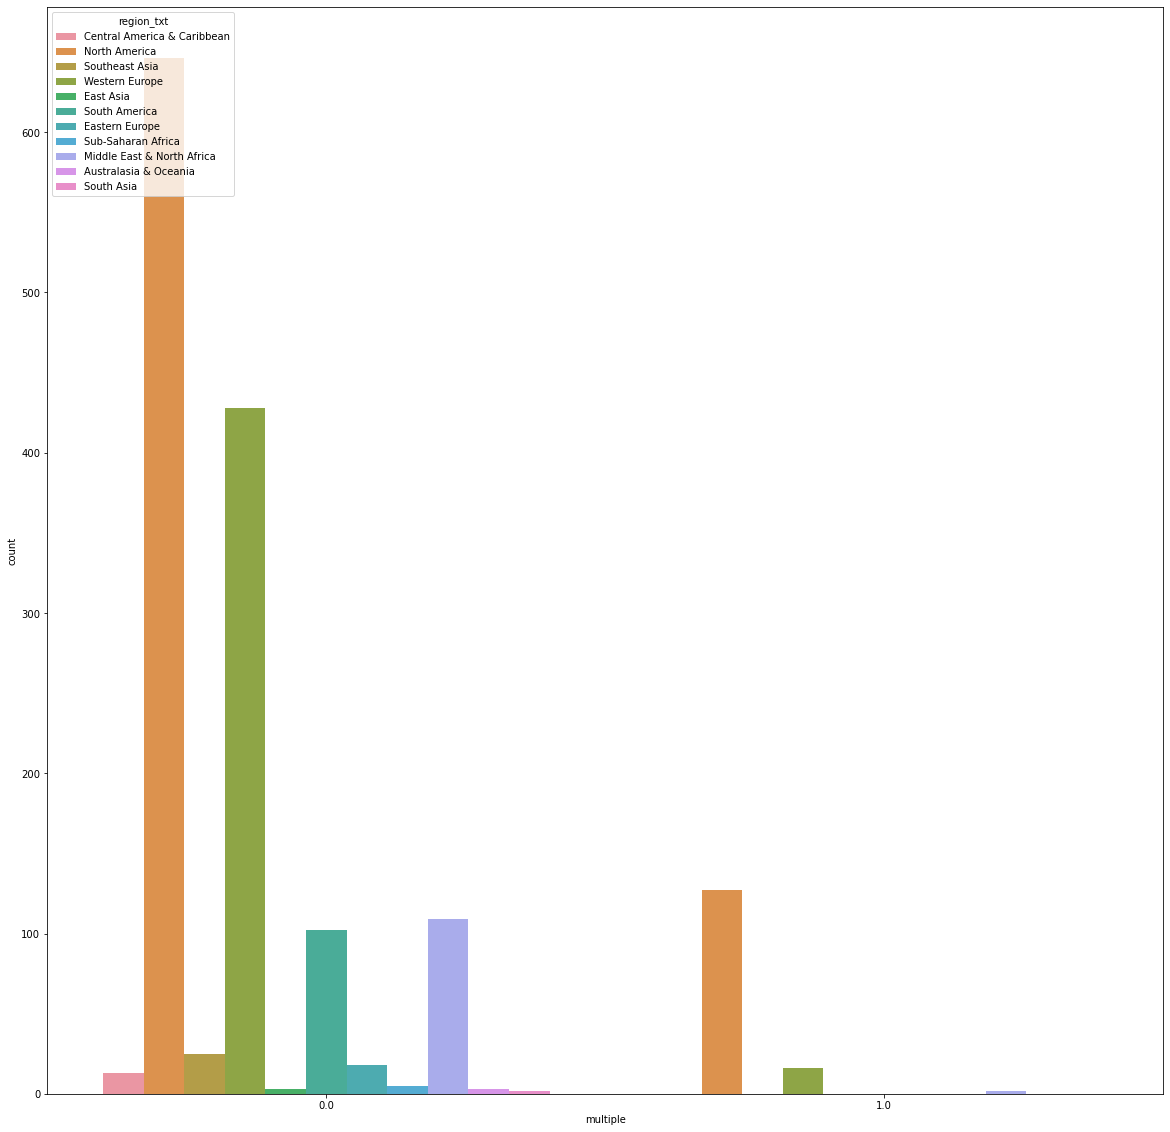

In [12]:
#taking 'multiple' as x axis and region_txt as hue. 
plt.figure(figsize=(20,20))
sns.countplot(x='multiple', hue = 'region_txt' , data=data_1)

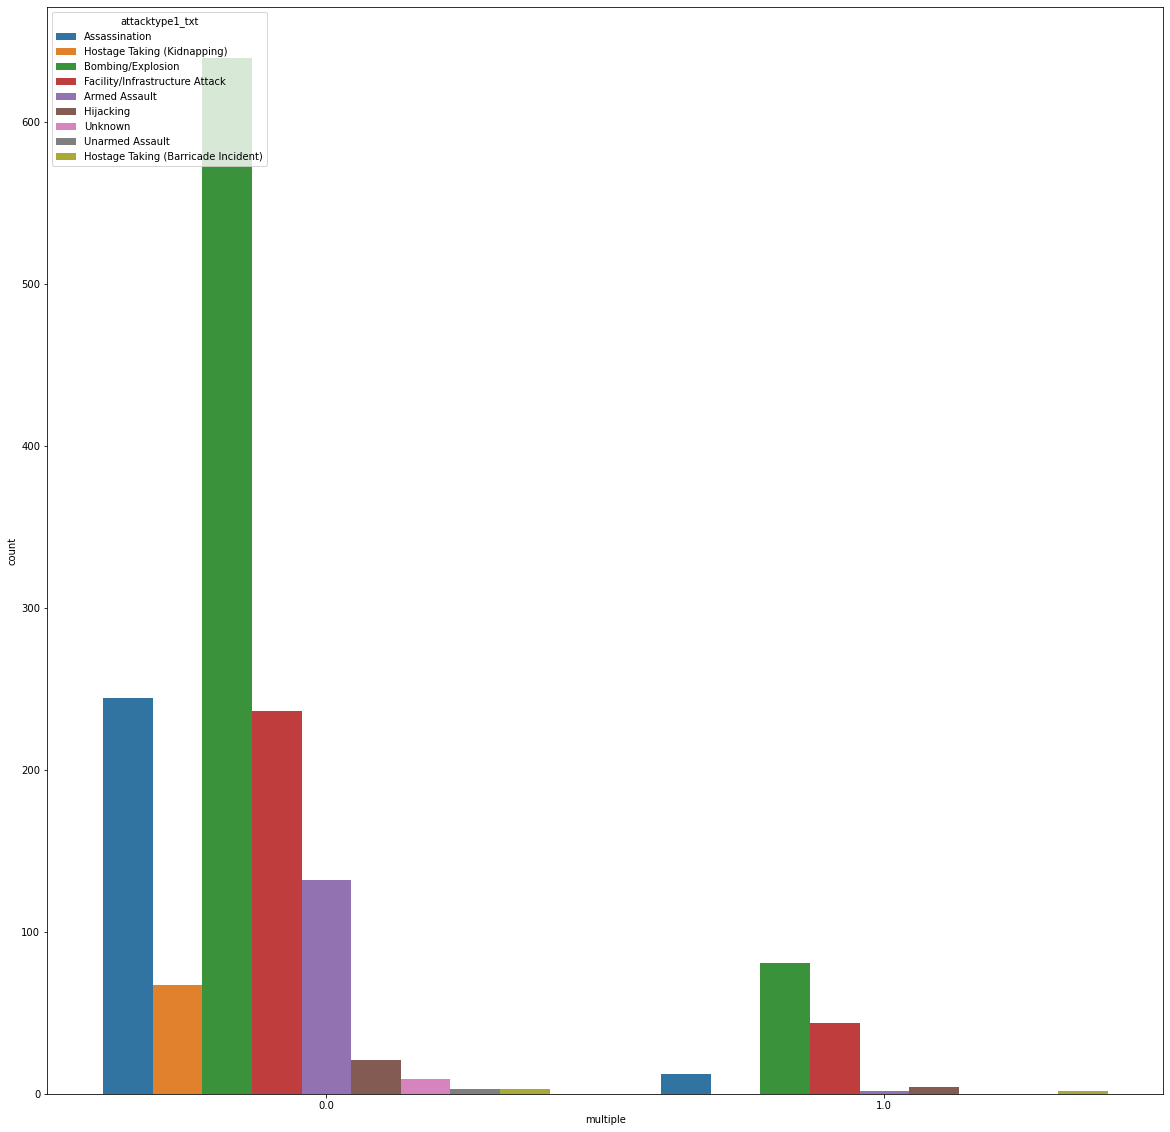

In [13]:
# taking 'multiple' as x axis and attacktype1_txt as hue.
plt.figure(figsize=(20,20))
sns.countplot(x='multiple', hue = 'attacktype1_txt' , data=data_1)

## Insights and security issues.

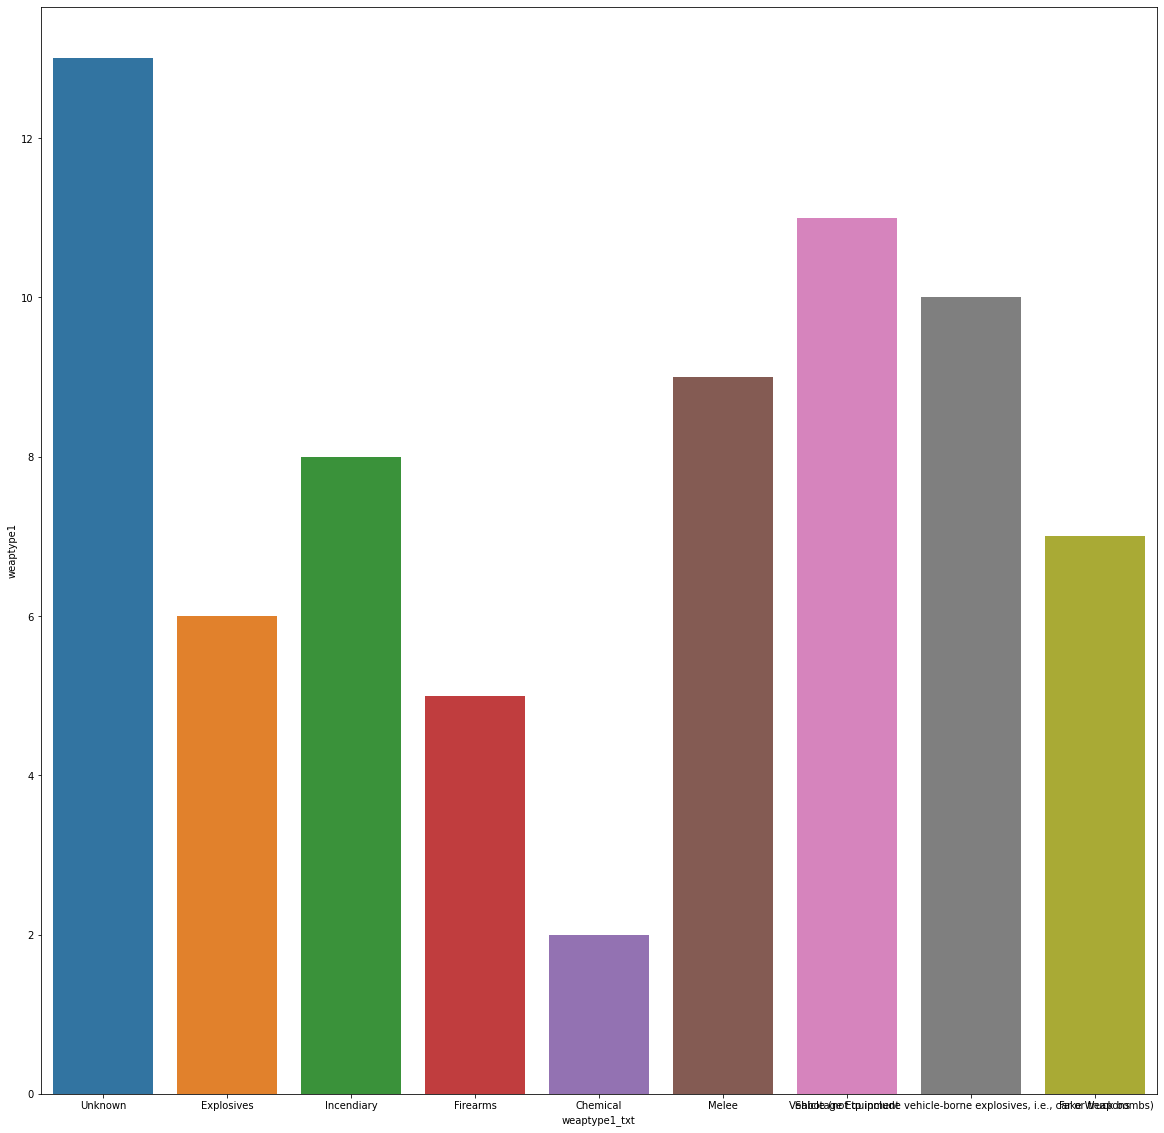

In [14]:
# taking 'weaptype1' as y and 'weaptype1_txt' as x.
plt.figure(figsize=(20,20))
sns.barplot(y='weaptype1' ,x='weaptype1_txt' , data=data_1)

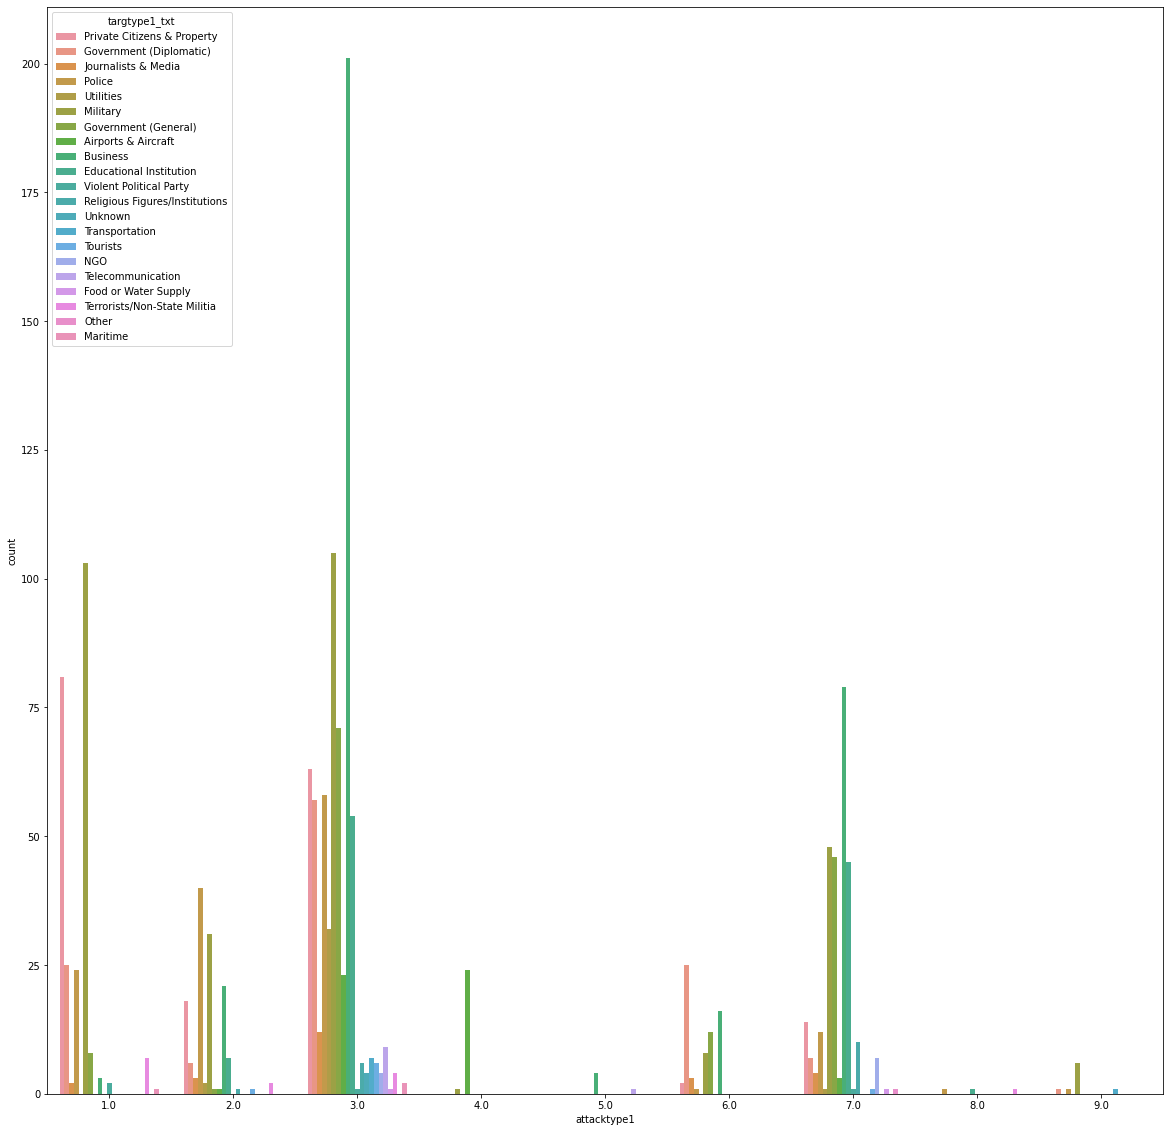

In [15]:
# taking 'attacktype1' as x and 'targttype1_txt' as hue.
plt.figure(figsize=(20,20))
sns.countplot(x='attacktype1', hue = 'targtype1_txt' , data=data_1)